In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Data
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

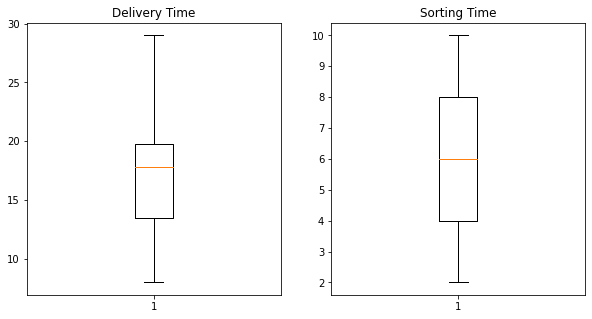

In [8]:
#Boxplot
plt.subplots(figsize = (10, 5))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [9]:
#correlation
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

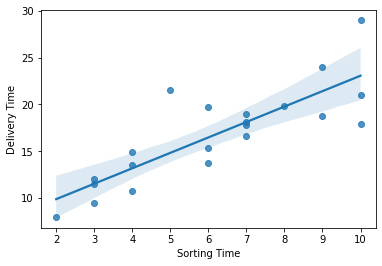

In [10]:
#Visualization of correlation between x and y using regression plot
sns.regplot(df['Sorting Time'], y = df['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

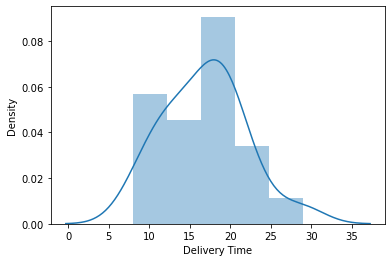

In [11]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

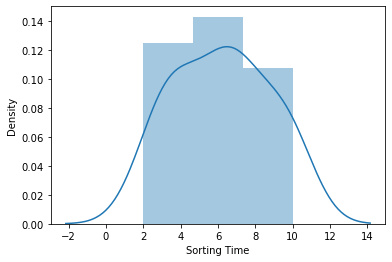

In [12]:
sns.distplot(df['Sorting Time'])

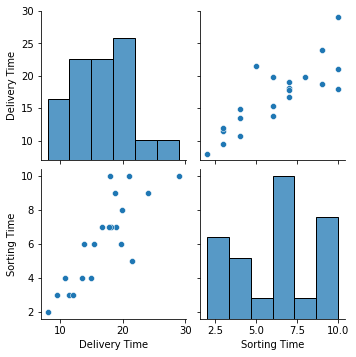

In [13]:
sns.pairplot(df)

In [14]:
#rename the column
df1 = df.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, axis=1)
df1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

# Model Building using Ordinary Least Squares (OLS) Regression

In [16]:
model = smf.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        22:39:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square Root Transformation on Data

In [18]:
model1 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sat, 23 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                            22:39:33   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cube Root Transformation on Data

In [19]:
model2 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sat, 23 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                            22:39:33   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation on Data

In [20]:
model3 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 23 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           22:39:33   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we can notice from the above model 
#### 1. After Log Transformation on the data, this model has scored the highest R-squared and Adj R-squared scores than previous models, but scores are still below 0.85
#### 2. Though it is close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. 

# Model Testing
### As Y = β0 + β1*(X)
### Finding Coefficient Parameters (β0 and β1 values)

In [21]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


# Residual Analysis
## Test for Normality of Residuals (Q-Q plot)

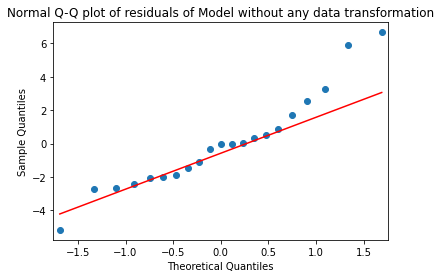

In [23]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

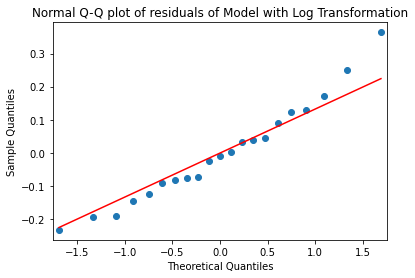

In [24]:
sm.qqplot(model3.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log Transformation')
plt.show()

## Residual Plot to check Homoscedasticity or Heteroscedasticity

In [25]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

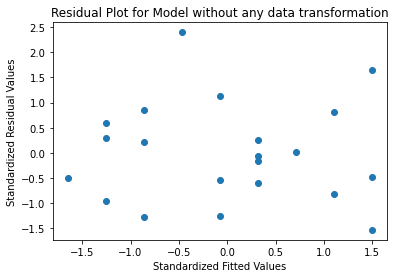

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

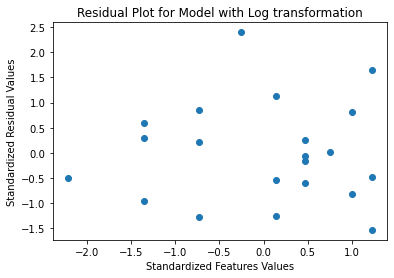

In [27]:
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Model Validation
### Comparing different models with respect to their Root Mean Squared Errors

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
model1_pred_y = np.square(model1.predict(df1['Sorting_Time']))
model2_pred_y = pow(model2.predict(df1['Sorting_Time']), 3)
model3_pred_y = np.exp(model3.predict(df1['Sorting_Time']))

In [30]:
model1_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'], model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'], model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'], model3_pred_y))
print('model = ', np.sqrt(model.mse_resid), '\n' 'model_1 = ', model1_rmse, '\n' 'model_2 = ', model2_rmse, '\n' 'model_3 = ', model3_rmse)

model =  2.9349037688901394 
model_1 =  2.762294279320867 
model_2 =  2.755584309893575 
model_3 =  2.7458288976145497


In [31]:
data = {'model': np.sqrt(model.mse_resid), 'model_1': model1_rmse, 'model_2': model2_rmse, 'model_3': model3_rmse}
min(data, key = data.get)

'model_3'

## Predicting values from Model with Log Transformation on the Data

In [32]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model3.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [33]:
predicted.to_excel("Predicted_Values_withLog.xlsx")

## Predicting from Original Model without any data transformation

In [34]:
predicted_1 = pd.DataFrame()
predicted_1['Sorting_Time'] = df1.Sorting_Time
predicted_1['Delivery_Time'] = df1.Delivery_Time
predicted_1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted_1.Sorting_Time))
predicted_1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [35]:
predicted_1.to_excel("Predicted_Values_without_Log.xlsx")